In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import random

In [3]:
x = random.sample(range(0, 999999999), 1100)
y = []
for i in x:
    y.append(2*i + 12)

In [4]:
print(len(x), len(y))

1100 1100


In [5]:
for i in range(len(x)):
    print(x[i], y[i])

281207382 562414776
637881941 1275763894
239811535 479623082
51471371 102942754
47467327 94934666
660480020 1320960052
402803154 805606320
936691242 1873382496
183566404 367132820
604672976 1209345964
62910210 125820432
703235130 1406470272
885457235 1770914482
96851265 193702542
562889015 1125778042
987544951 1975089914
730499528 1460999068
443474426 886948864
658435424 1316870860
203788833 407577678
175953342 351906696
542690502 1085381016
429468042 858936096
425779453 851558918
713930905 1427861822
443875393 887750798
100125803 200251618
996518987 1993037986
477449554 954899120
280038797 560077606
851522995 1703046002
910956355 1821912722
246649875 493299762
104788984 209577980
759281042 1518562096
110141894 220283800
970725296 1941450604
487609138 975218288
851940418 1703880848
21868047 43736106
534216524 1068433060
315610242 631220496
291439793 582879598
616109033 1232218078
107568478 215136968
607596376 1215192764
126407488 252814988
416662519 833325050
141467993 282935998
276062

In [6]:
x = np.array(x)
y = np.array(y)

In [7]:
x

array([281207382, 637881941, 239811535, ..., 137758309, 771882995,
       685164330])

In [8]:
u = x.mean()
std = x.std()

In [9]:
std

293254823.8409007

In [10]:
x = (x - u)/std

In [11]:
u_y = y.mean()
std_y = y.std()
y = (y-u_y)/std_y

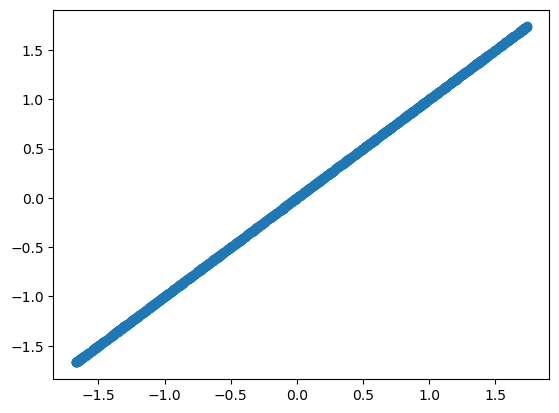

In [12]:
plt.scatter(x, y)

In [13]:
print(x.shape, y.shape, x[0], y[0])

(1100,) (1100,) -0.7126549417609492 -0.7126549417609492


In [14]:
def hypothesis(X, theta):
    y_ = theta[0] + theta[1]*X
    return y_

In [15]:
def cost(X, Y, theta):
    m = X.shape[0]
    
    total_loss = 0
    
    for i in range(m):
        y_p = hypothesis(X[i], theta)
        
        y_gt = Y[i]
        
        total_loss+=(y_p - y_gt)**2
        
    return total_loss/m

In [16]:
def gradient(X, Y, theta):
    m = X.shape[0]
    
    grad = np.zeros((2,))
    
    for i in range(m):
        y_p = hypothesis(X[i], theta)
        
        y_gt = Y[i]
        
        grad[0] += (y_p - y_gt)*1
        grad[1] += (y_p - y_gt)*X[i]
        
    return grad/m

In [17]:
def gradient_descent(X, Y, learning_rate = 0.001, epochs = 100):
    
    theta = np.zeros((2,))
    cost_epoch = []
    
    for i in range(epochs):
        loss = cost(X, Y, theta)
        grad = gradient(X, Y, theta)
        cost_epoch.append(loss)
        
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
    return theta, cost_epoch

In [18]:
X_train = x[:1000]
Y_train = y[:1000]
X_test = x[1000:]
Y_test = y[1000:]

In [19]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1000,) (100,) (1000,) (100,)


In [20]:
theta, cost_epoch = gradient_descent(X_train, Y_train, learning_rate=0.3, epochs=100)

In [21]:
theta

array([2.29985005e-16, 1.00000000e+00])

In [22]:
cost_epoch

[0.9943300398842778,
 0.4895263711923093,
 0.24103784928425775,
 0.11870190780360411,
 0.05846461957972469,
 0.02879991350082676,
 0.01418899061325634,
 0.006991553788134694,
 0.003445540779903052,
 0.0016982521225846032,
 0.0008371583142395855,
 0.00041273684806014487,
 0.00020351604808434843,
 0.00010036525302319161,
 4.9502477616025514e-05,
 2.441905367662114e-05,
 1.2047267803101193e-05,
 5.944367219200945e-06,
 2.933455513772864e-06,
 1.4478036301128627e-06,
 7.146535480759698e-07,
 3.528065472048036e-07,
 1.7419366166729557e-07,
 8.601657099535666e-08,
 4.248008667770536e-08,
 2.0981743512572998e-08,
 1.036454108617918e-08,
 5.120475736120102e-09,
 2.530006754905381e-09,
 1.250211757193577e-09,
 6.178675670875571e-10,
 3.0539120777588285e-10,
 1.509615530894115e-10,
 7.463185863826134e-11,
 3.690027606469508e-11,
 1.8246593856506178e-11,
 9.023607627044373e-12,
 4.462972190422035e-12,
 2.207563028700171e-12,
 1.092059670193534e-12,
 5.402855136284846e-13,
 2.6732732149428185e-13,

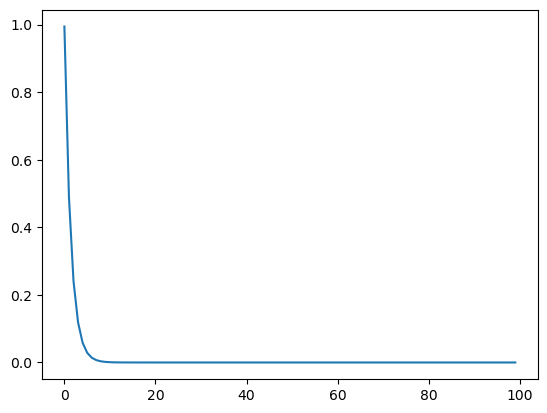

In [23]:
plt.plot(cost_epoch)

In [24]:
y_p = theta[0] + theta[1]*X_test

In [25]:
for i in range(len(y_p)):
    print(y_p[i], Y_test[i])

0.313386410463294 0.31338641046329396
-1.4646966443030667 -1.4646966443030676
-1.5515407366403742 -1.551540736640375
-0.13797506849335298 -0.13797506849335325
0.4616483501324889 0.4616483501324889
-0.13135960016246367 -0.13135960016246395
0.23549657151424336 0.23549657151424325
0.31939044810175155 0.3193904481017515
0.7118089546168684 0.7118089546168685
-0.7513174293937221 -0.7513174293937227
1.1349871768012965 1.1349871768012967
1.0931235994551298 1.09312359945513
1.5734173390609762 1.5734173390609767
0.4633165954953185 0.4633165954953185
1.4452222440660658 1.4452222440660663
1.635929057572197 1.6359290575721974
-1.4642620598064477 -1.4642620598064486
-1.0113874463199464 -1.011387446319947
-0.19089048791171792 -0.19089048791171823
-1.2233053618926362 -1.2233053618926368
-0.7134691585464483 -0.7134691585464489
-1.0121797060923758 -1.0121797060923765
-1.055444566440874 -1.0554445664408747
1.2072926199728085 1.2072926199728087
-0.564054845676452 -0.5640548456764525
0.654559366084581 0.65

In [26]:
def R2_score(y_t, y_p):
    num = np.sum((y_t - y_p)**2)
    den = np.sum((y_t - y_t.mean())**2)
    
    score = (1 - num/den)
    
    return score

In [27]:
R2_score(Y_test, y_p)

1.0

In [28]:
T0 = np.arange(-50, 50)
T1 = np.arange(-50, 50)
T0, T1 = np.meshgrid(T0, T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_pred = T0[i, j] + T1[i, j]*X_test
        J[i, j] = (np.sum((y_pred - Y_test)**2))/Y_test.shape[0]

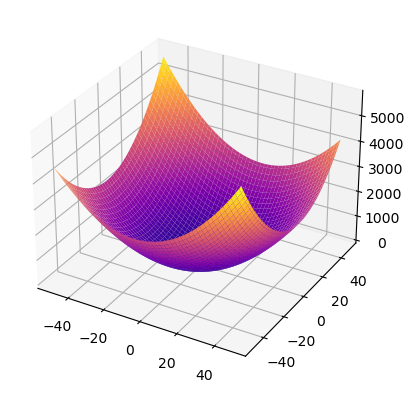

In [29]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(T0, T1, J, cmap = 'plasma')

In [30]:
def gradient_descent(X, Y, learning_rate = 0.001, epochs = 100):
    
    theta = np.zeros((2,))
    cost_epoch = []
    theta_list = []
    
    for i in range(epochs):
        loss = cost(X, Y, theta)
        grad = gradient(X, Y, theta)
        cost_epoch.append(loss)
        
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        theta_list.append([theta[0], theta[1]])
        
    return theta, cost_epoch, theta_list

In [31]:
_, cost, theta_list = gradient_descent(X_train, Y_train, learning_rate=0.3, epochs=100)

In [32]:
theta_list = np.array(theta_list)
cost = np.array(cost)

In [33]:
T0 = np.arange(-50, 50)
T1 = np.arange(-50, 50)
T0, T1 = np.meshgrid(T0, T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_pred = T0[i, j] + T1[i, j]*X_test
        J[i, j] = (np.sum((y_pred - Y_test)**2))/Y_test.shape[0]

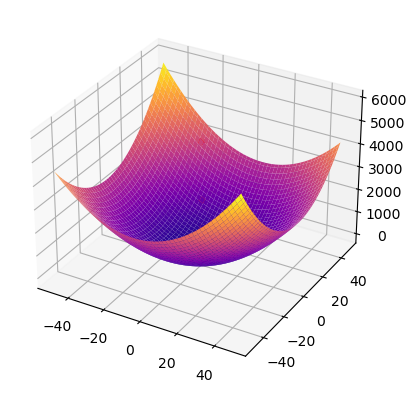

In [38]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(T0, T1, J, cmap = 'plasma')
ax.scatter(theta_list[:, 0], theta_list[:, 1], cost, color = 'red')

In [35]:
len(theta_list[:, 0])

100

In [36]:
cost

array([9.94330040e-01, 4.89526371e-01, 2.41037849e-01, 1.18701908e-01,
       5.84646196e-02, 2.87999135e-02, 1.41889906e-02, 6.99155379e-03,
       3.44554078e-03, 1.69825212e-03, 8.37158314e-04, 4.12736848e-04,
       2.03516048e-04, 1.00365253e-04, 4.95024776e-05, 2.44190537e-05,
       1.20472678e-05, 5.94436722e-06, 2.93345551e-06, 1.44780363e-06,
       7.14653548e-07, 3.52806547e-07, 1.74193662e-07, 8.60165710e-08,
       4.24800867e-08, 2.09817435e-08, 1.03645411e-08, 5.12047574e-09,
       2.53000675e-09, 1.25021176e-09, 6.17867567e-10, 3.05391208e-10,
       1.50961553e-10, 7.46318586e-11, 3.69002761e-11, 1.82465939e-11,
       9.02360763e-12, 4.46297219e-12, 2.20756303e-12, 1.09205967e-12,
       5.40285514e-13, 2.67327321e-13, 1.32283541e-13, 6.54651391e-14,
       3.24007877e-14, 1.60376824e-14, 7.93903281e-15, 3.93036525e-15,
       1.94597357e-15, 9.63560662e-16, 4.77154113e-16, 2.36306223e-16,
       1.17038278e-16, 5.79717439e-17, 2.87170548e-17, 1.42264946e-17,
      

In [37]:
cost = cost * 5000

In [39]:
cost

array([4.97165020e+03, 2.44763186e+03, 1.20518925e+03, 5.93509539e+02,
       2.92323098e+02, 1.43999568e+02, 7.09449531e+01, 3.49577689e+01,
       1.72277039e+01, 8.49126061e+00, 4.18579157e+00, 2.06368424e+00,
       1.01758024e+00, 5.01826265e-01, 2.47512388e-01, 1.22095268e-01,
       6.02363390e-02, 2.97218361e-02, 1.46672776e-02, 7.23901815e-03,
       3.57326774e-03, 1.76403274e-03, 8.70968308e-04, 4.30082855e-04,
       2.12400433e-04, 1.04908718e-04, 5.18227054e-05, 2.56023787e-05,
       1.26500338e-05, 6.25105879e-06, 3.08933784e-06, 1.52695604e-06,
       7.54807765e-07, 3.73159293e-07, 1.84501380e-07, 9.12329693e-08,
       4.51180381e-08, 2.23148610e-08, 1.10378151e-08, 5.46029835e-09,
       2.70142757e-09, 1.33663661e-09, 6.61417707e-10, 3.27325696e-10,
       1.62003938e-10, 8.01884120e-11, 3.96951640e-11, 1.96518263e-11,
       9.72986784e-12, 4.81780331e-12, 2.38577057e-12, 1.18153111e-12,
       5.85191390e-13, 2.89858720e-13, 1.43585274e-13, 7.11324729e-14,
      